# **Project 2**

The notebook conducts a clustering analysis using survey data to identify distinct consumer segments for a running footwear and apparel company. It employs hierarchical and K-means clustering, starting with data exploration, preparation, and similarity metrics calculation. The Elbow method helps determine the optimal number of clusters, followed by K-means implementation. The final analysis profiles each cluster to provide actionable insights for tailored product offerings and targeted marketing strategies.

# Worked Solo


# **Importing the required packages**

In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from google.colab import files
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# **Loading the data set**

In [ ]:
# Upload and read the file
file = files.upload()
df = pd.read_excel("survey_data.xlsx")

# Display the first few rows of the DataFrame
df.head()

Saving survey_data.xlsx to survey_data.xlsx


,record,id,S1r1,S1r2,S1r3,S2r1,S2r2,S3r1,S3r2,S4r1,...,Q6r1,Q6r2,Q6r3,Q6r4,Q6r5,Q7r1,Q7r2,Q7r3,Q7r4,Q7r5
0,1,9731743,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
1,2,5917428,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,2459391,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
3,4,3277896,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,5,4986375,1,0,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0


**Renaming the datasets for ease of use**

In [ ]:

new_column = {
    'S1r1': 'US',
    'S1r2': 'UK',
    'S1r3': 'Jap',
    'S2r1': 'Valid',
    'S2r2': 'Invalid',
    'S3r1': 'Male',
    'S3r2': 'Female',
    'S4r1': 'Under_18',
    'S4r2': '18-24',
    'S4r3': '25-34',
    'S4r4': '35-44',
    'S4r5': '45-54',
    'S4r6': 'Above_55',
    'Q1r1': 'Occasional',
    'Q1r2': 'Fairly_reg',
    "Q1r3": 'Gen_5+_a_week',
    'Q2r1': '1_pair_multi_use',
    'Q2r2': '1_pair_running',
    'Q2r3': '3+_pairs',
    'Q2r4': '5+_pairs',
    'Q3r1': 'cush_not_sure',
    'Q3r2': 'cush_Foam',
    'Q3r3': 'cush_Rubber',
    "Q3r4": 'cush_Foam&Rubber',
    'Q4r1': 'plat_noraces',
    'Q4r2': 'plat_sameshoes',
    'Q4r3': 'plat_rubber',
    'Q4r4': 'plat_foam',
    'Q4r5': 'plat_carbon',
    'Q5r1': 'yoga_pilates',
    'Q5r2': 'only_running',
    'Q5r3': 'spinning',
    'Q5r4': 'strength_cond',
    'Q5r5': 'swimming',
    'Q5r6': 'Hiking',
    'Q6r1': 'no_complaints',
    'Q6r2': 'fast_wear',
    'Q6r3': 'too_narrow',
    'Q6r4': 'too_heavy',
    'Q6r5': 'feel_great_notfashion',
    'Q7r1': 'bright&bold',
    'Q7r2': 'soft_pastels',
    'Q7r3': 'Earth_tones',
    'Q7r4': 'neutrals',
    'Q7r5': 'something_normal'

}

# Renamed the columns
df.rename(columns=new_column, inplace=True)

df.head()

,record,id,US,UK,Jap,Valid,Invalid,Male,Female,Under_18,...,no_complaints,fast_wear,too_narrow,too_heavy,feel_great_notfashion,bright&bold,soft_pastels,Earth_tones,neutrals,something_normal
0,1,9731743,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
1,2,5917428,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,2459391,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
3,4,3277896,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,5,4986375,1,0,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0


**Basic information about the dataset**

In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   record                 175 non-null    int64
 1   id                     175 non-null    int64
 2   US                     175 non-null    int64
 3   UK                     175 non-null    int64
 4   Jap                    175 non-null    int64
 5   Valid                  175 non-null    int64
 6   Invalid                175 non-null    int64
 7   Male                   175 non-null    int64
 8   Female                 175 non-null    int64
 9   Under_18               175 non-null    int64
 10  18-24                  175 non-null    int64
 11  25-34                  175 non-null    int64
 12  35-44                  175 non-null    int64
 13  45-54                  175 non-null    int64
 14  Above_55               175 non-null    int64
 15  Occasional             175 non-null    i

**Observations:**  
1) The dataset consists of 175 rows and 47 columns.  
2) All the columns contain numerical data.  
3) There are no missing values in the dataset.  

In [ ]:
# Get summary statistics
df.describe()


,record,id,US,UK,Jap,Valid,Invalid,Male,Female,Under_18,...,no_complaints,fast_wear,too_narrow,too_heavy,feel_great_notfashion,bright&bold,soft_pastels,Earth_tones,neutrals,something_normal
count,175.000000,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,88.000000,5.267812e+06,0.588571,0.177143,0.160000,0.862857,0.148571,0.422857,0.451429,0.211429,...,0.165714,0.148571,0.051429,0.085714,0.520000,0.177143,0.217143,0.234286,0.165714,0.148571
std,50.662281,2.664352e+06,0.493505,0.382885,0.367658,0.344985,0.356686,0.495431,0.499063,0.409493,...,0.372891,0.356686,0.221504,0.280745,0.501033,0.382885,0.413484,0.424767,0.372891,0.356686
min,1.000000,1.035396e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.500000,2.882270e+06,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,88.000000,5.139211e+06,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,131.500000,7.396717e+06,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,175.000000,9.973724e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Check for duplicates**

In [ ]:
# Check for duplicates values
df.duplicated().any()

False

There are no duplicates in the dataset

# **Exploratory Data Analysis**

**Demographics** : **Bar Chart for Age Groups**


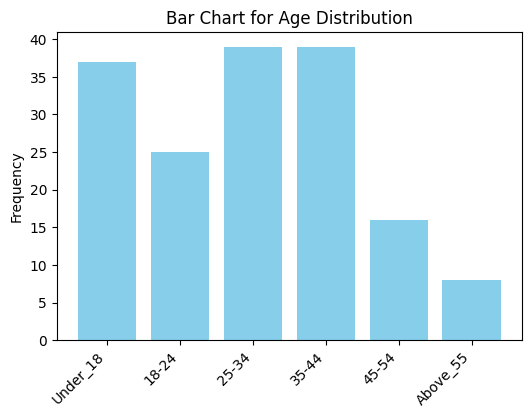

In [ ]:
import matplotlib.pyplot as plt

# Define the data for the bar plot
responses = ['Under_18', '18-24', '25-34', '35-44', '45-54', 'Above_55']
data = df[responses].sum()  # Summing up responses for each category

# Create the bar plot
plt.figure(figsize=(6, 4))
plt.bar(data.index, data.values, color='skyblue')

# Customize the plot
plt.title('Bar Chart for Age Distribution')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')

# Display the plot
plt.show()


1) Focus on 25–44 age group—your largest customer base.<br>
2) Tap into Under 18 for youth-oriented products.<br>
3) Grow in 18–24 and 45–54 by offering tailored options.<br>
4) Explore niche products for Above 55 for added opportunities.

**Demographics** : **Pie chart for Geographic distribution and Gender distribution**

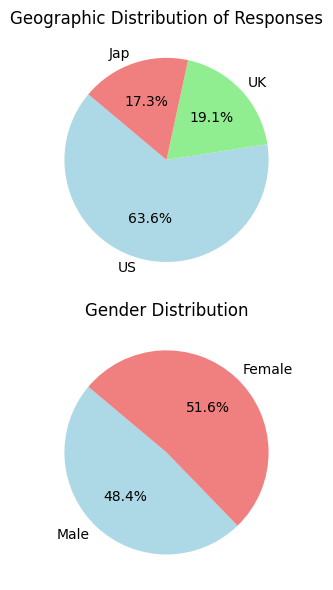

In [ ]:
# Sum responses for geographic regions and gender distribution
regions = ['US', 'UK', 'Jap']
region_data = df[regions].sum()

gender_labels = ['Male', 'Female']
gender_data = df[gender_labels].sum()

# Create a figure with two subplots (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# Plot Pie Chart for Geographical Information
axes[0].pie(region_data, labels=regions, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
axes[0].set_title('Geographic Distribution of Responses')

# Plot Pie Chart for Gender Distribution
axes[1].pie(gender_data, labels=gender_labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
axes[1].set_title('Gender Distribution')

# Display the combined figure
plt.tight_layout()
plt.show()



- **Geographic**: Most responses are from the US (63.6%), followed by the UK (19.1%) and Japan (17.3%).
- **Gender**: Nearly balanced, with 51.6% female and 48.4% male.

**Footwear** **Usage** : **Donut chart for Running Frequency and Shoe Ownership**

In [ ]:
import plotly.express as px

running_freq_labels = ['Occasional', 'Fairly_reg', 'Gen_5+_a_week']
running_freq_data = df[running_freq_labels].sum()

no_of_shoes_labels = ['1_pair_multi_use', '1_pair_running', '3+_pairs', '5+_pairs']
no_of_shoes_data = df[no_of_shoes_labels].sum();


counts_rf = df[running_freq_labels].sum()
counts_nos = df[no_of_shoes_labels].sum()

# Create a donut chart 1 using Plotly
fig1 = px.pie(
    names=running_freq_labels,
    values=running_freq_data,
    hole=0.4,
    color_discrete_sequence=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
)

# Create a donut chart 2 using Plotly
fig2 = px.pie(
    names=no_of_shoes_labels,
    values=no_of_shoes_data,
    hole=0.4,
    color_discrete_sequence=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
)
fig1.update_layout(title='Frequency of Running',width=600,height=400)
fig2.update_layout(title='Number of Running Shoes',width=600,height=400)

# Display the donut charts
fig1.show()
fig2.show()


Running Frequency: 35.5% run more than 5 times weekly (dedicated), 32.9% occasionally (casual), and 31.6% fairly regularly (mid-level).  
Running Shoes: 33.5% use one pair (loyal/budget-conscious), 29.7% own 3+ pairs (invested), and 10.1% own 5+ pairs (enthusiasts/athletes).

**Footwear Usage :** **Bubble chart for cushioning category and type of plating**

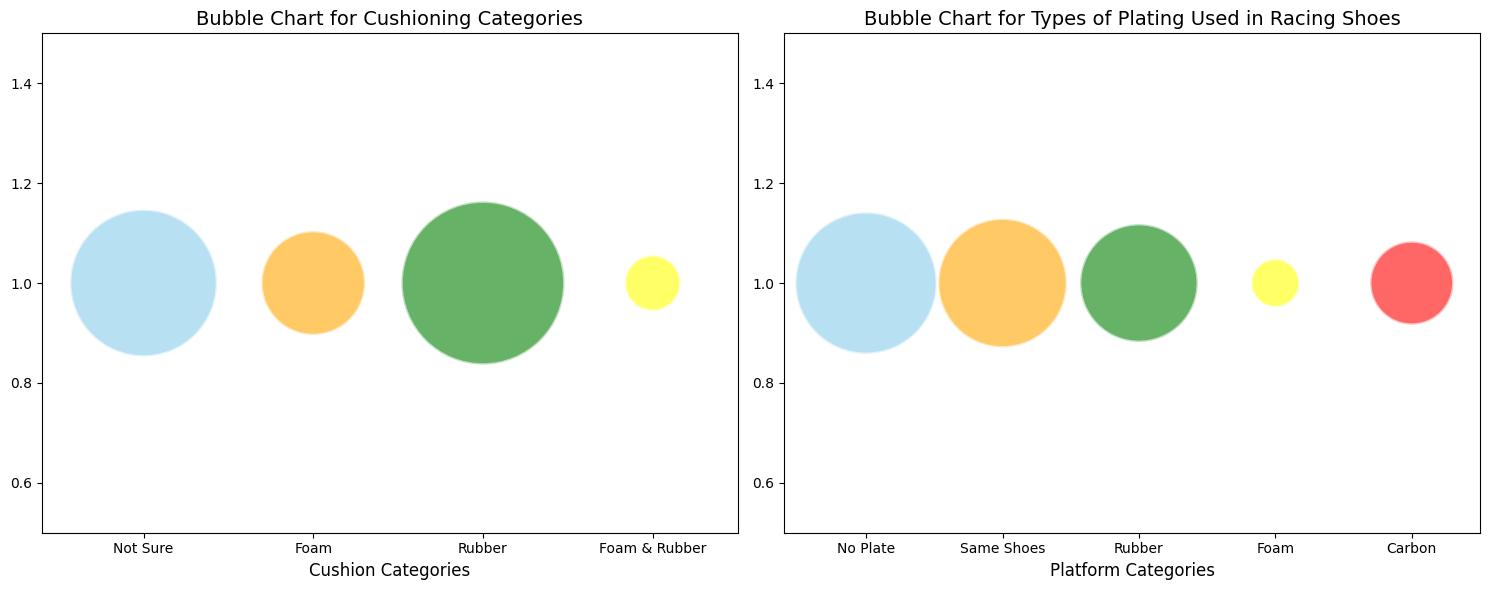

In [ ]:
import matplotlib.pyplot as plt

# Define the data for the bubble chart
cushion = ['Not Sure', 'Foam', 'Rubber', 'Foam & Rubber']
cushion_data = df[['cush_not_sure', 'cush_Foam', 'cush_Rubber', 'cush_Foam&Rubber']].sum()

plat = ['No Plate', 'Same Shoes', 'Rubber', 'Foam', 'Carbon']
plat_data = df[['plat_noraces', 'plat_sameshoes', 'plat_rubber', 'plat_foam', 'plat_carbon']].sum()

# Create a figure with subplots
plt.figure(figsize=(15, 6))

# Plot the first bubble chart for cushioning categories
plt.subplot(1, 2, 1)
plt.scatter(cushion, [1] * len(cushion), s=cushion_data * 200, color=['skyblue', 'orange', 'green', 'yellow'], alpha=0.6, edgecolors="w", linewidth=2)
plt.title('Bubble Chart for Cushioning Categories', fontsize=14)
plt.xlabel('Cushion Categories', fontsize=12)
plt.ylim(0.5, 1.5)
plt.xlim(-0.6, len(cushion) - 0.5)  # Add extra space on both ends of x-axis

# Plot the second bubble chart for platform categories
plt.subplot(1, 2, 2)
plt.scatter(plat, [1] * len(plat), s=plat_data * 200, color=['skyblue', 'orange', 'green', 'yellow', 'red'], alpha=0.6, edgecolors="w", linewidth=2)
plt.title('Bubble Chart for Types of Plating Used in Racing Shoes', fontsize=14)
plt.xlabel('Platform Categories', fontsize=12)
plt.ylim(0.5, 1.5)
plt.xlim(-0.6, len(plat) - 0.5)  # Add extra space on both ends of x-axis

# Display the plots
plt.tight_layout()  # Adjusts the subplots to fit into the figure area nicely
plt.show()


The left chart shows "Rubber" as the most preferred cushioning material, while the right chart highlights "No Plate" and "Same Shoes" as the top plating choices for racing shoes. These insights guide product focus and marketing strategies.

**Pie chart for Activity Preference**

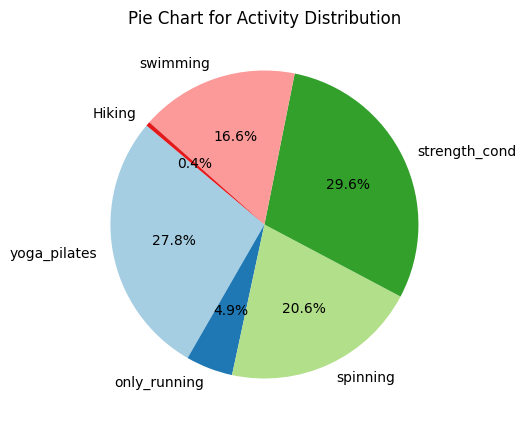

In [ ]:
import matplotlib.pyplot as plt


activity = ['yoga_pilates', 'only_running', 'spinning', 'strength_cond', 'swimming', 'Hiking']
data = df[activity].sum()  # Summing up responses for each category

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Customize the plot
plt.title('Pie Chart for Activity Distribution')

# Display the plot
plt.show()



The chart shows "strength_cond" and "yoga_pilates" as the top activities, while "Hiking" and "only_running" are the least preferred.

**Bar Chart for Complaints and Color preference**

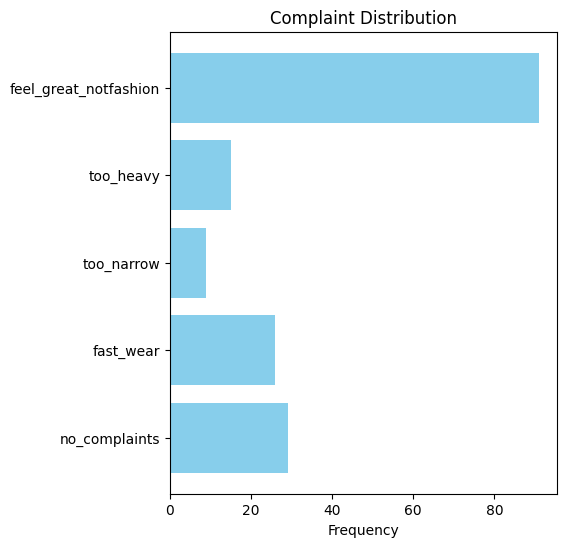

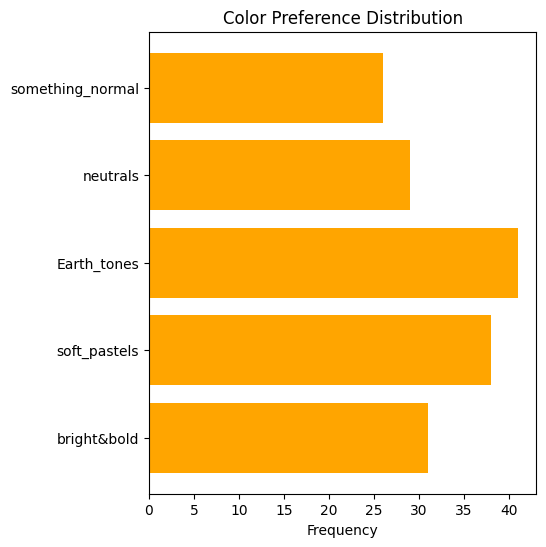

In [ ]:
# Define the data for the bar plot
complaint = ['no_complaints', 'fast_wear', 'too_narrow', 'too_heavy', 'feel_great_notfashion']
complaint_data = df[complaint].sum()  # Summing up responses for each complaint category

color_pref = ['bright&bold', 'soft_pastels', 'Earth_tones', 'neutrals', 'something_normal']
color_pref_data = df[color_pref].sum()  # Summing up responses for each color preference category

# Create the first bar plot for complaints
plt.figure(figsize=(5, 6))  # Adjust size as needed
plt.barh(complaint, complaint_data.values, color='skyblue')
plt.title('Complaint Distribution')
plt.xlabel('Frequency')
plt.show()

# Create the second bar plot for color preferences
plt.figure(figsize=(5, 6))  # Adjust size as needed
plt.barh(color_pref, color_pref_data.values, color='orange')
plt.title('Color Preference Distribution')
plt.xlabel('Frequency')
plt.show()


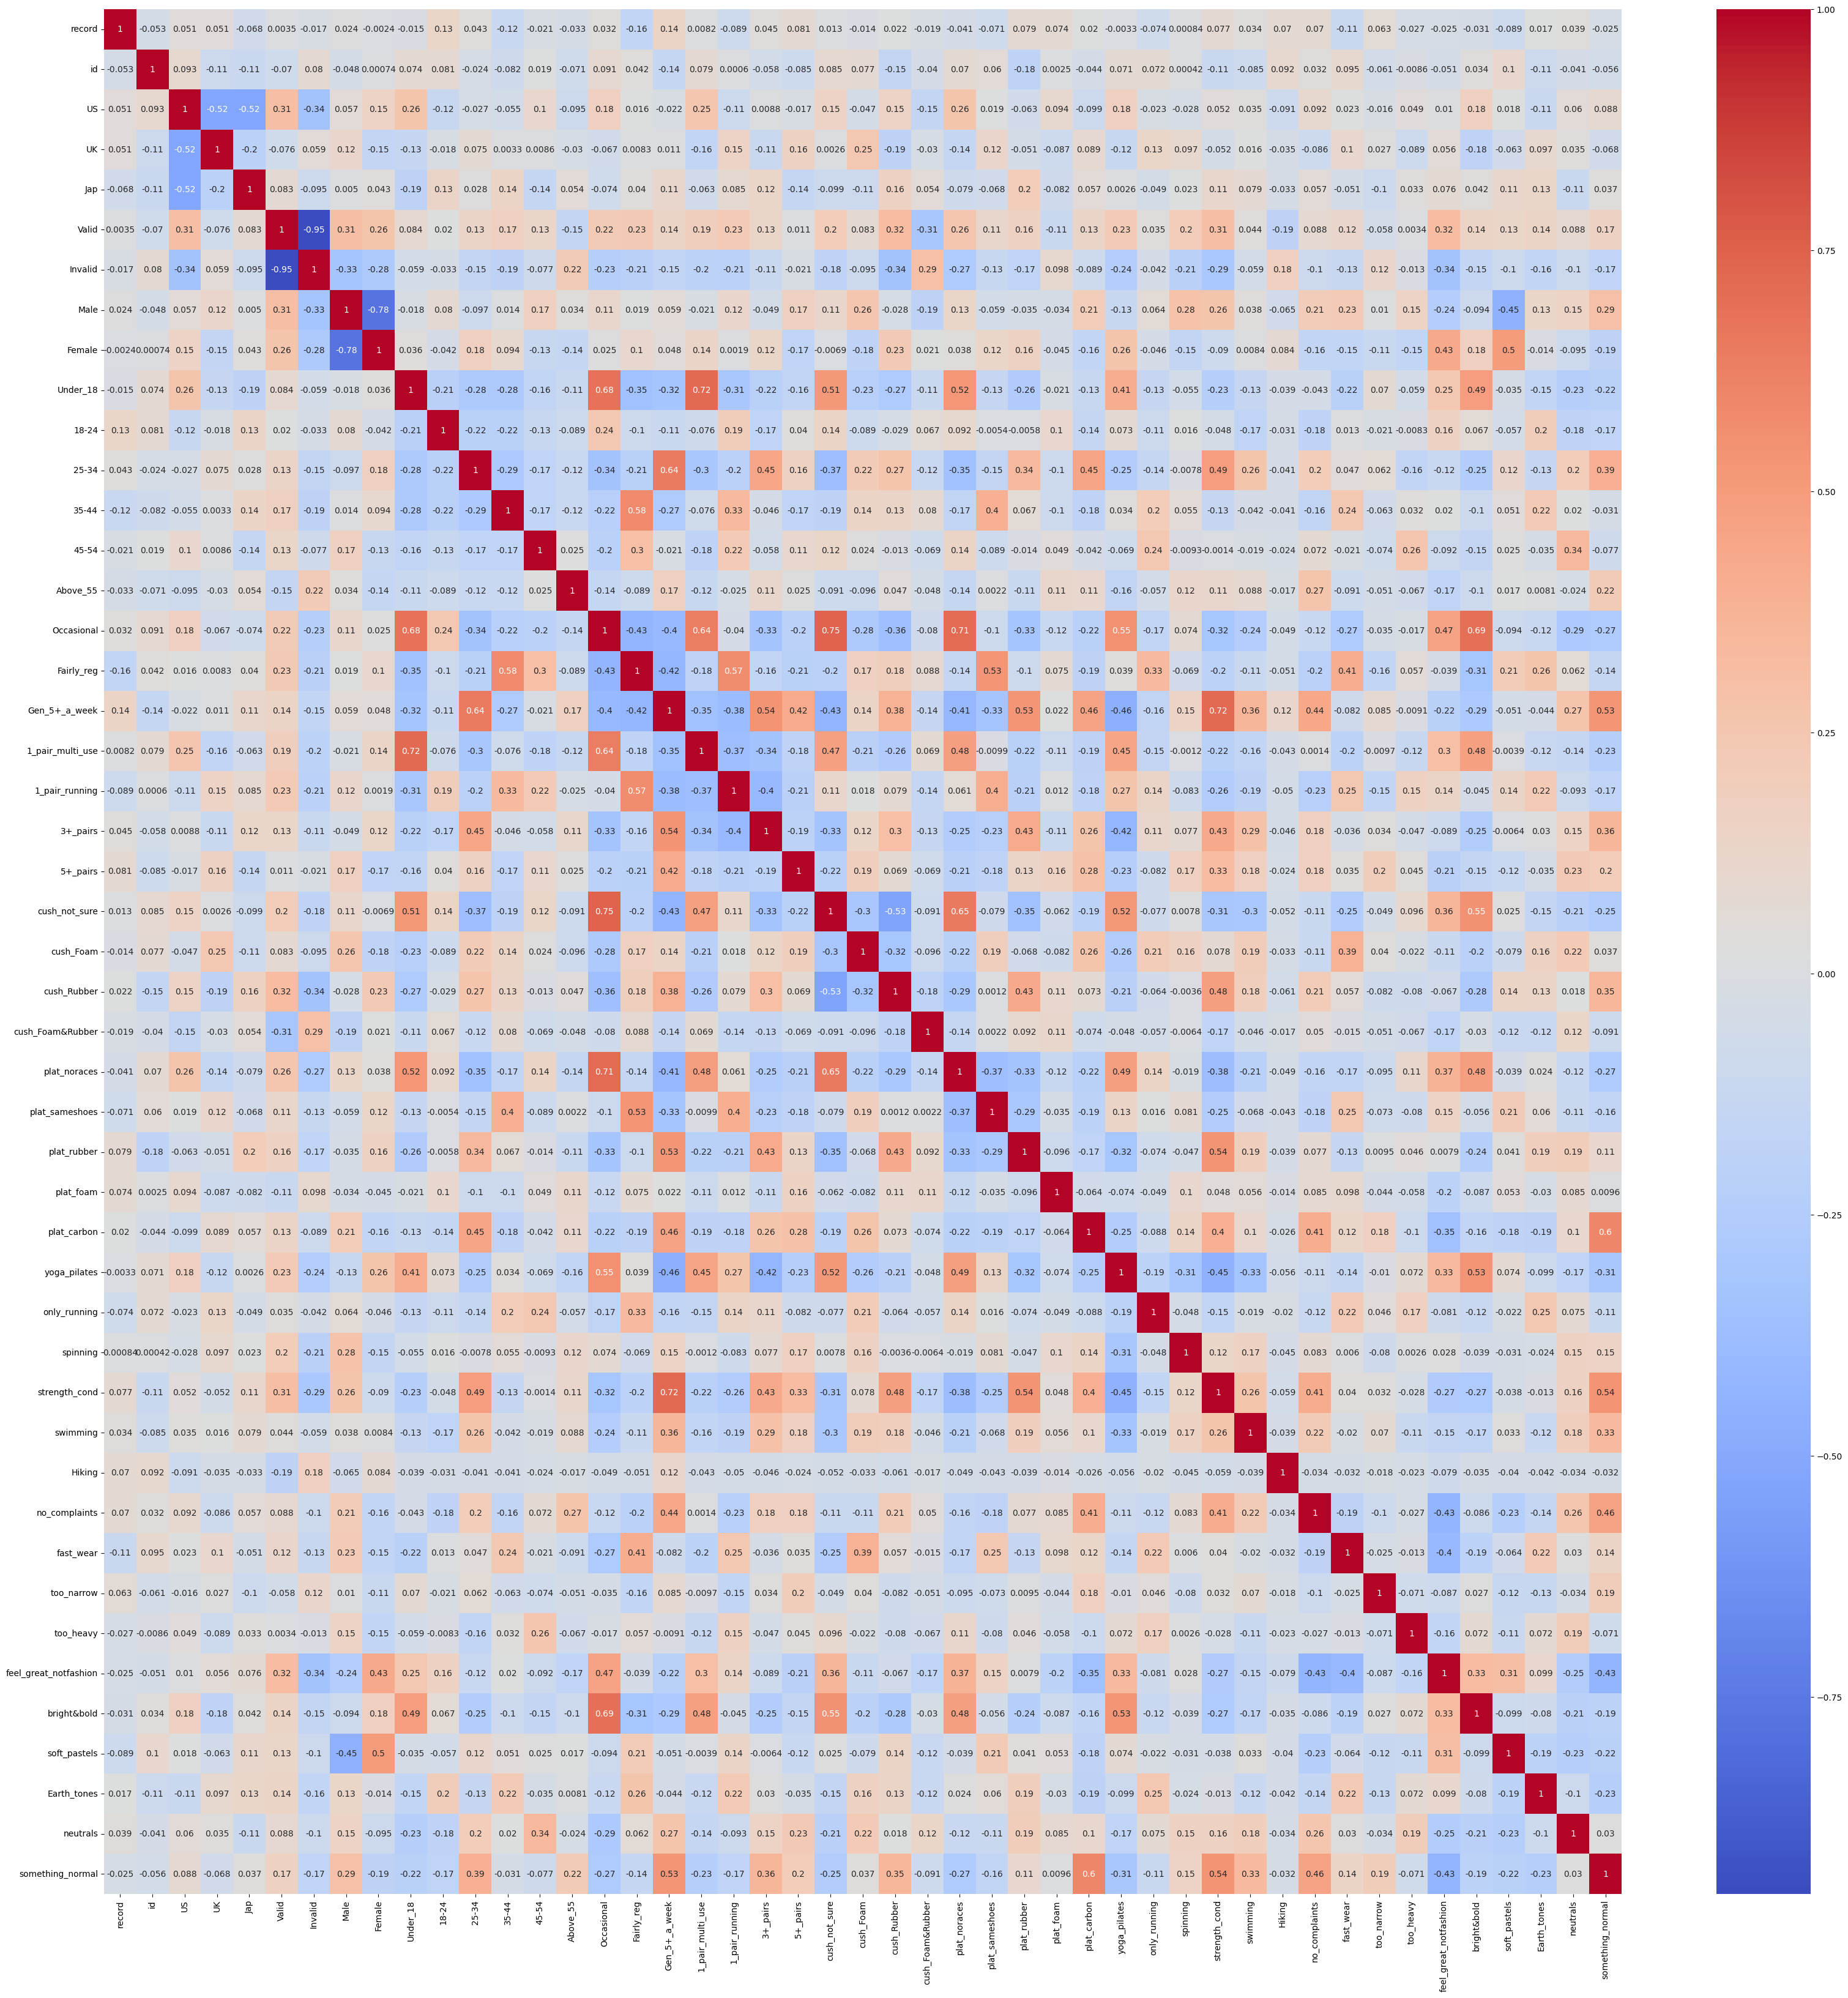

In [ ]:
corr_matrix = df.corr(method='kendall') # pearson, spearman, kendall
plt.figure(figsize  = (40,40))
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm")
plt.show()

In [ ]:
# Identifying highly correlated attributes
corr_threshold = 0.8  # Set the correlation threshold

# Find pairs of variables with a correlation above the threshold
corr_pairs = [
    (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
    for i in range(len(corr_matrix.columns))
    for j in range(i + 1, len(corr_matrix.columns))
    if abs(corr_matrix.iloc[i, j]) > corr_threshold
]

# Print the highly correlated pairs
for col1, col2, corr_value in corr_pairs:
    print(f"Correlation between {col1} and {col2}: {corr_value}")


Correlation between Valid and Invalid: -0.9543850054696523


Valid and invalid have a high corelation

*   **Since the dataset consists entirely of binary variables, scaling and normalization are unnecessary.**


In [ ]:
# Filtering for valid responses and selecting relevant features
valid_survey_data = df[df['Valid'] == 1]

#Dropping unecessary rows
data = valid_survey_data.drop(columns = ['Invalid','id','record'])

# Convert the DataFrame to boolean type
data_bool = data.astype(bool)

#Previewing the data after dropping the columns
data.head()

,US,UK,Jap,Valid,Male,Female,Under_18,18-24,25-34,35-44,...,no_complaints,fast_wear,too_narrow,too_heavy,feel_great_notfashion,bright&bold,soft_pastels,Earth_tones,neutrals,something_normal
0,1,0,0,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
1,0,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,0,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


# **Hierarical Clustering**

In [ ]:
def jaccard_similarity(x, y):
    intersection = np.logical_and(x, y).sum()
    union = np.logical_or(x, y).sum()
    return intersection / union if union != 0 else 0

# Compute the Jaccard similarity matrix
n = len(data_bool)
jaccard_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            jaccard_matrix[i, j] = jaccard_similarity(data_bool.iloc[i], data_bool.iloc[j])


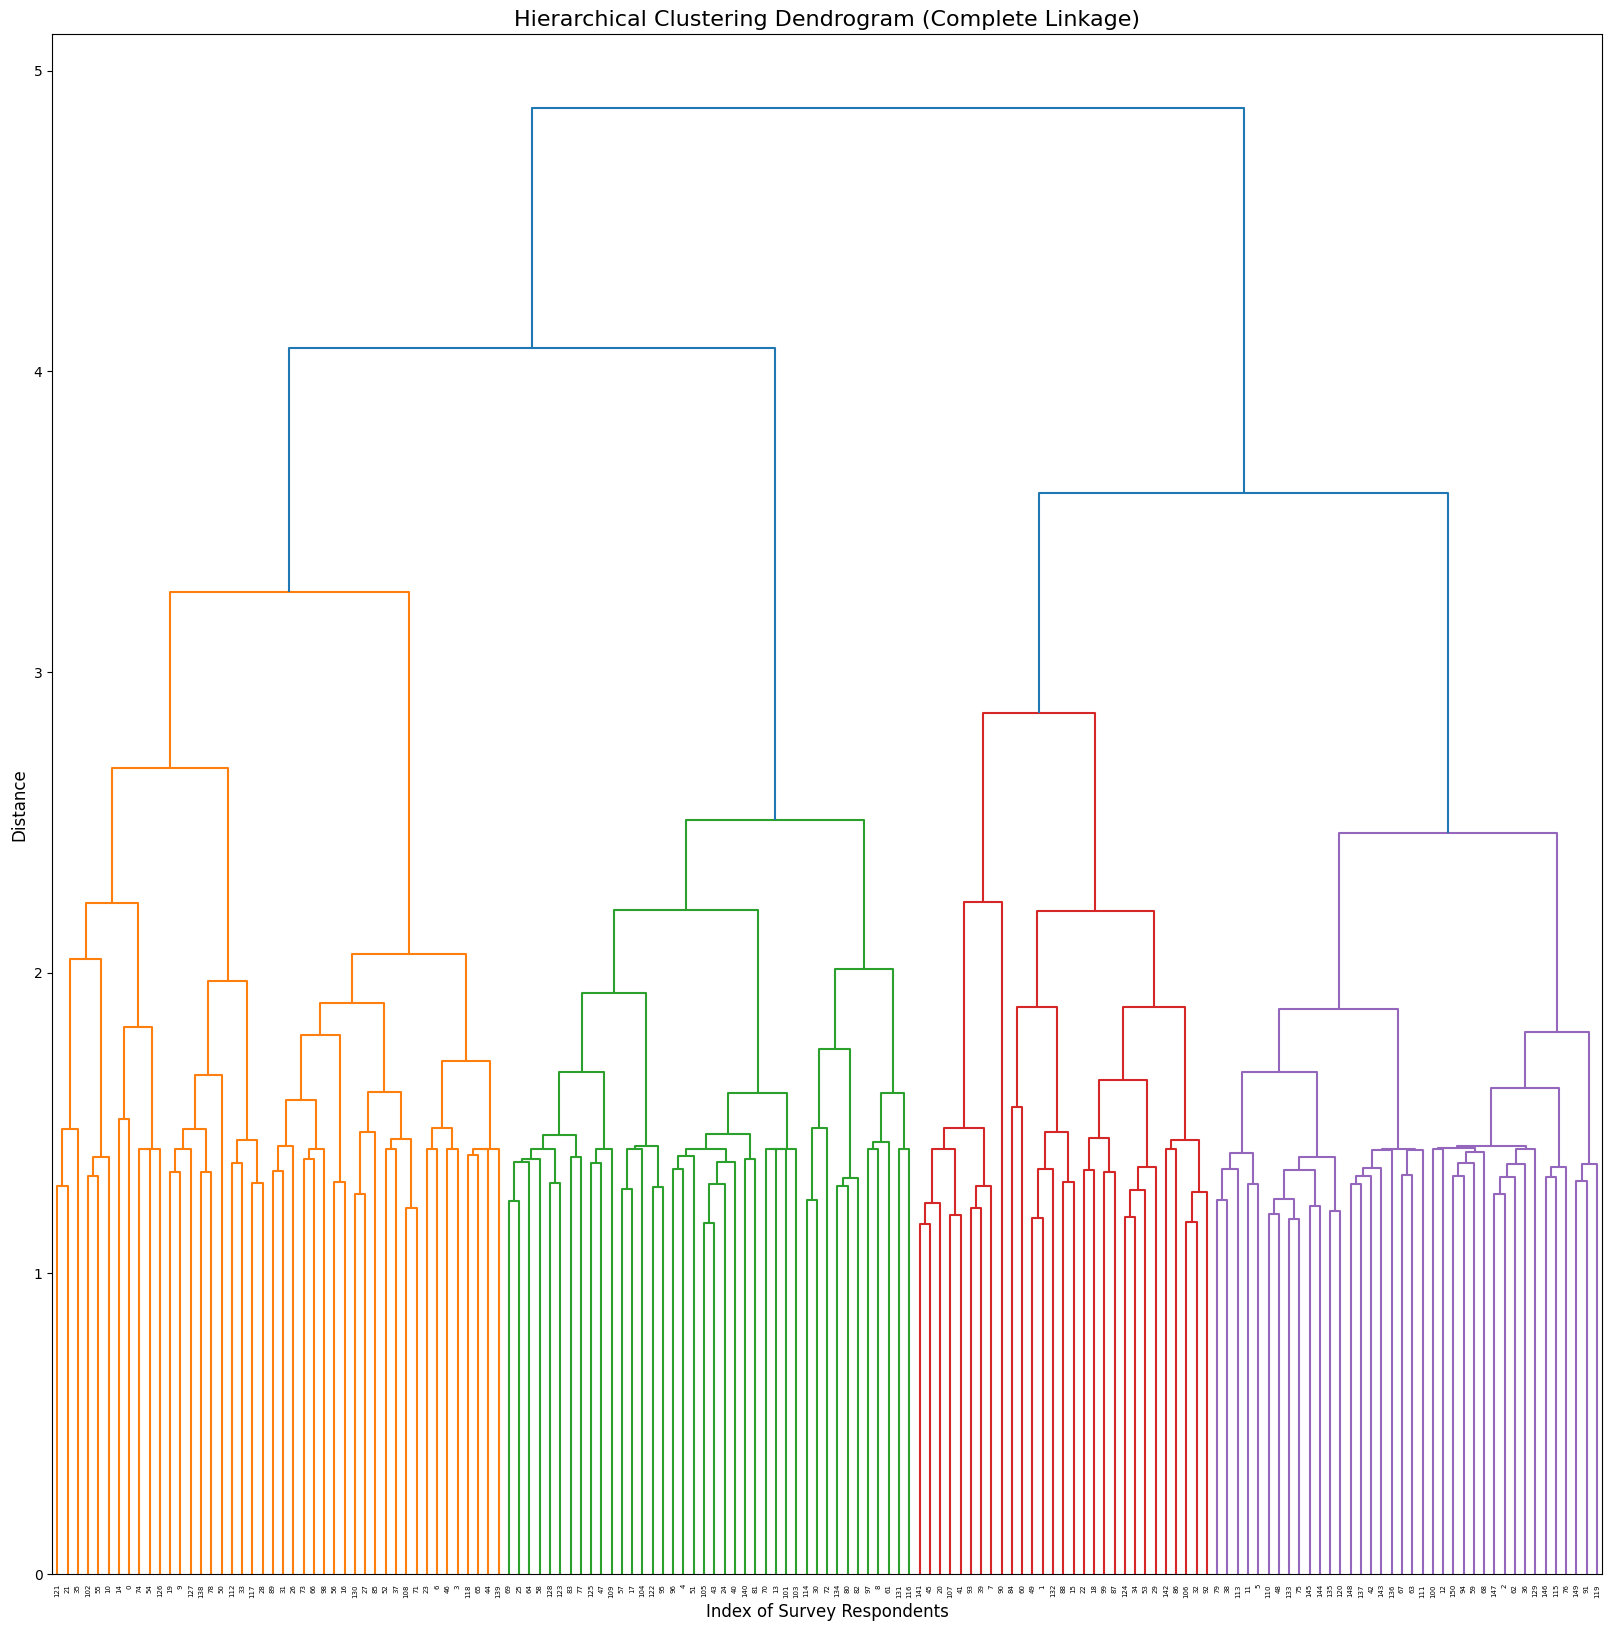

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Create a linkage matrix using the 'complete' linkage method
linkage_matrix = linkage(1 - jaccard_matrix, method='complete')

# Create a figure and set the size
plt.figure(figsize=(20, 20))

# Plot the dendrogram with enhanced visualization options
dendrogram(linkage_matrix, orientation='top', distance_sort='descending', show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)', fontsize=16)
plt.xlabel('Index of Survey Respondents', fontsize=12)
plt.ylabel('Distance', fontsize=12)

# Display the plot
plt.show()


Distinct clusters are evident, but identifying the precise number of clusters may necessitate additional analysis. These clusters correspond to various segments of running consumers, each exhibiting unique traits based on their survey responses.

In [ ]:
#Printing the jaccard_matrix
pd.DataFrame(jaccard_matrix)

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,0.000000,0.333333,0.083333,0.142857,0.090909,0.136364,0.142857,0.263158,0.190476,0.300000,...,0.190476,0.500000,0.086957,0.238095,0.263158,0.142857,0.090909,0.130435,0.142857,0.040000
1,0.333333,0.000000,0.333333,0.375000,0.047619,0.210526,0.222222,0.222222,0.150000,0.263158,...,0.150000,0.466667,0.150000,0.200000,0.294118,0.294118,0.294118,0.142857,0.294118,0.263158
2,0.083333,0.333333,0.000000,0.333333,0.142857,0.315789,0.200000,0.200000,0.136364,0.238095,...,0.136364,0.090909,0.388889,0.238095,0.263158,0.600000,0.600000,0.368421,0.600000,0.733333
3,0.142857,0.375000,0.333333,0.000000,0.294118,0.095238,0.692308,0.047619,0.352941,0.263158,...,0.045455,0.294118,0.150000,0.090909,0.100000,0.222222,0.222222,0.142857,0.222222,0.333333
4,0.090909,0.047619,0.142857,0.294118,0.000000,0.095238,0.375000,0.100000,0.533333,0.333333,...,0.045455,0.100000,0.150000,0.090909,0.100000,0.222222,0.157895,0.142857,0.222222,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.142857,0.294118,0.600000,0.222222,0.222222,0.352941,0.157895,0.375000,0.210526,0.142857,...,0.210526,0.100000,0.533333,0.263158,0.375000,0.000000,0.833333,0.500000,0.692308,0.600000
147,0.090909,0.294118,0.600000,0.222222,0.157895,0.277778,0.222222,0.294118,0.150000,0.142857,...,0.277778,0.157895,0.437500,0.200000,0.294118,0.833333,0.000000,0.411765,0.571429,0.600000
148,0.130435,0.142857,0.368421,0.142857,0.142857,0.562500,0.090909,0.500000,0.136364,0.040000,...,0.388889,0.043478,0.923077,0.444444,0.411765,0.500000,0.411765,0.000000,0.333333,0.444444
149,0.142857,0.294118,0.600000,0.222222,0.222222,0.277778,0.157895,0.222222,0.210526,0.200000,...,0.210526,0.100000,0.352941,0.333333,0.466667,0.692308,0.571429,0.333333,0.000000,0.411765


Based on the dendrogram and the clustering insights provided, the company should adopt a segmentation-based approach to enhance product development and marketing strategies. Develop tailored product lines for each cluster, addressing specific preferences like cushioning for comfort-oriented runners or durability for high-performance users. Marketing efforts should leverage data to create cluster-specific campaigns, targeting frequent runners with premium products while appealing to less frequent users with versatile options. Implement personalized recommendations online and in-store, offering customization features to align with individual preferences. Further, refine these strategies by incorporating additional data sources, such as purchasing behavior and geographical trends, to deepen consumer insights and achieve a more precise clustering framework for decision-making.

# **Kmeans Clustering**

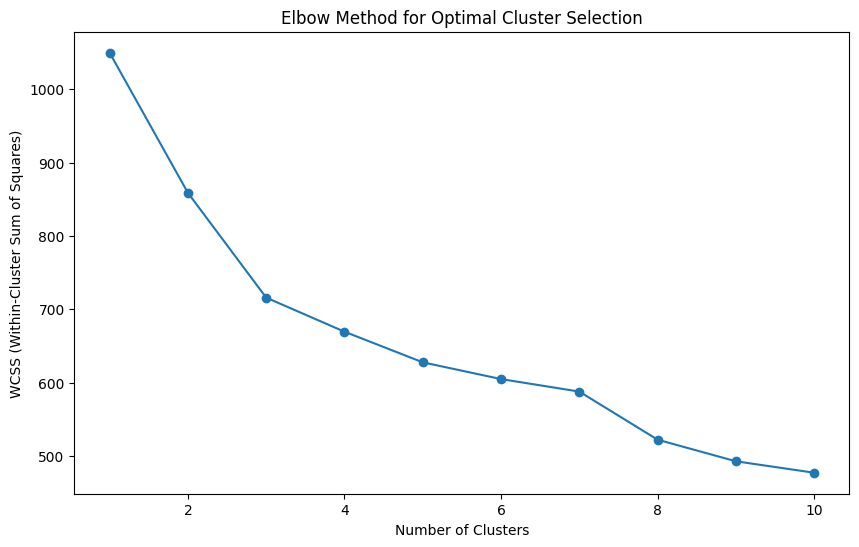

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []  # List to store Within-Cluster Sum of Squares (WCSS)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Visualize the WCSS values to identify the "elbow" point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Cluster Selection')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


Based on Elbow method , Selected **number of clusters = 3**

In [ ]:
k = 3  # Number of clusters

# Initialize and fit K-means clustering model
kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans_model.fit_predict(data)

# Append the cluster labels to the DataFrame
data['Cluster_Label'] = cluster_labels


In [ ]:
# Grouping the data by 'Cluster' and computing the average for each group
cluster_summary = data.groupby('Cluster_Label').agg('mean')
cluster_summary


,US,UK,Jap,Valid,Male,Female,Under_18,18-24,25-34,35-44,...,no_complaints,fast_wear,too_narrow,too_heavy,feel_great_notfashion,bright&bold,soft_pastels,Earth_tones,neutrals,something_normal
Cluster_Label,,,,,,,,,,,,,,,,,,,,,
0,0.622642,0.188679,0.169811,1.0,0.433962,0.547170,0.000000,0.094340,0.094340,0.584906,...,0.056604,0.358491,0.000000,0.113208,0.509434,0.0,0.358491,0.415094,0.207547,0.056604
1,0.583333,0.166667,0.229167,1.0,0.500000,0.479167,0.020833,0.083333,0.666667,0.062500,...,0.395833,0.125000,0.104167,0.062500,0.333333,0.0,0.187500,0.187500,0.333333,0.479167
2,0.740000,0.140000,0.120000,1.0,0.520000,0.480000,0.660000,0.260000,0.000000,0.080000,...,0.100000,0.000000,0.040000,0.080000,0.900000,0.6,0.160000,0.160000,0.000000,0.000000


## **Conclusion**


### **Cluster 0: Active Yet Fashion-Conscious**

- **Demographics:** Predominantly 35-44 years, gender balanced, mostly in the US.  
- **Footwear Usage:** Regular runners, use 1 pair for running, prefer rubber cushioning and same-platform style as shoes.  
- **Activity Preferences:** Mostly engage in yoga/pilates.  
- **Complaints:** Shoes feel great but seem out of fashion, and some report fast wear.  
- **Color Preferences:** Favor soft pastels and earth tones.  

**Recommendation:**  
Focus on comfortable and functional shoes that blend performance with subtle, modern designs. Target the **active 35-44 demographic** who value comfort for yoga/pilates and occasional running. Improve durability to address wear concerns, and introduce styles that balance comfort with aesthetics.  

---

### **Cluster 1: "Performance-Oriented and Active"**  

- **Demographics:** Predominantly 25-34 years, balanced gender, mostly in the US.  
- **Footwear Usage:** Run 5+ times a week, use 3+ pairs for running, prefer rubber cushioning and rubber-plated shoes.  
- **Activity Preferences:** Primarily focused on strength conditioning.  
- **Complaints:** Shoes feel great but lack style; few have complaints.  
- **Color Preferences:** Prefer neutrals and simple designs.  

**Recommendation:**  
Develop high-performance footwear for intensive activities like running and strength training. Offer durable, rubber-cushioned designs that handle frequent usage. Highlight functionality and simplicity, with neutral color options that match their understated preferences.  

---

### **Cluster 2: Young and Fashion-Forward**  

- **Demographics:** Predominantly under 18 years, balanced gender, mostly in the US.  
- **Footwear Usage:** Occasional runners, use 1 pair for multiuse**. Cushioning preferences unclear.  
- **Activity Preferences:** Mostly into yoga/pilates and spinning.  
- **Complaints:** Shoes feel great but look out of fashion.  
- **Color Preferences:** Prefer bright and bold colors.  

**Recommendation:**  
Design stylish, multifunctional shoes catering to yoga/pilates, spinning, and casual use. Emphasize modern aesthetics with bold, trendy colors to attract fashion-conscious younger consumers while maintaining comfort and functionality.  

---

### **Summary:**  

- **Cluster 0 (35-44):** Prioritize comfortable and stylish shoes for yoga and running, using soft pastels and earth tones.  
- **Cluster 1 (25-34):** Offer durable, high-performance shoes for intense activity, with neutral colors and a focus on simplicity.  
- **Cluster 2 (Under 18):** Develop fashionable, multifunctional shoes in bright, bold colors to appeal to young, style-driven users.  

---  